## Table of Contents:
* [Introduction](#introduction)
* [Implementation](#implementation)
* [Conclusion](#conclusion)

# 1. Introduction <a name="introduction"></a>


## Objectives
- Classify stars based on quantitative data
- Use linear regression and other machine learning models to predict labels 
- Explore relations of empirical colour data
- Use this notebook to learn about different Stars

## Dataset

Units of measure are relative to the Sun.

Temperature - Kelvin (K)
L - Luminosity relative to the Sun (L/Lo)
R - Radius relative to the Sun (R/Ro)
A_M - Absolute Magnitude (Mv)
Color - General Color of Spectrum
Spectral_Class - Class assigned based on reflectance spectrum, color, and sometimes albedo [(SMASS)](https://en.wikipedia.org/wiki/Asteroid_spectral_types)
Type - Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, Hyper Giants


'Type' will be the target label the model aims to predict

Data from: https://www.kaggle.com/datasets/brsdincer/star-type-classification

In [1]:
import pandas as pd

# load the data set
data = pd.read_csv("./Stars.csv")
display(data.head())

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


### Colour & Spectral Classes

`Color` and `Spectral_Class` stand out from the other features as two types of observed data, categorized by subjectivity. Classification by spectral luminosity has often been subject to poor range and criticism. Although examination of physical appearances and wavelengths is still widely used in astronomy, it is agreed upon as a temporary taxonomic system for general celestial objects.

The words in the `Color` column also contain tokens with the suffix '-ish', leading me to believe this part of the data was recorded manually.


For these reasons, I will exclude the `Color` and `Spectral_Class` variables from the main training data. Instead they will have comparisons explored as their own dataframe. 

https://en.wikipedia.org/wiki/Asteroid_spectral_types

0 - Red Dwarf, 1 - Brown Dwarf, 2-White Dwarf, 3-Main Sequence , 4-Super Giants, 5-Hyper Giants

In [2]:
# display unique data in both empirical columns
display(pd.unique(data['Color']))
display(pd.unique(data['Spectral_Class']))

# example of the standalone empirical dataframe
data_emp = data.iloc[:,4:6]
display(data_emp.head())

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

,Color,Spectral_Class
0,Red,M
1,Red,M
2,Red,M
3,Red,M
4,Red,M


# 2. Implementation <a name="implementation"></a>


## Preprocessing

In [3]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data set
data = pd.read_csv("./Stars.csv")
display(data.head())


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# display shape, type, and count of data
print(data.shape, '\n')
data.info()


(240, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
# check for 0 and null values
display(data.isna().sum())

# check for duplicated rows
data.duplicated().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

0

In [6]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Feature Engineering

In [ ]:
# fix tokens in Colors
# one hot encode colours
# one hot encode spectral class 

## Data Visualization

In [7]:
# split data by main features
data_features = data.iloc[:,0:4]
display(data_features.sample(n=5))

# dataframe of empirical features
data_emp = data.iloc[:,4:6]
display(data_emp.sample(n=5))

# dataframe of target labels
data_target = data.iloc[:,6:7]
display(data_target.sample(n=5))
target_names = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']


,Temperature,L,R,A_M
10,3600,0.00290,0.5100,10.69
127,2861,0.00019,0.0899,16.71
40,3826,200000.00000,19.0000,-6.93
63,2835,0.00034,0.0918,16.96
68,2774,0.00036,0.1180,17.39


,Color,Spectral_Class
51,Red,M
166,Blue,O
134,Red,M
138,Red,M
91,yellowish,K


,Type
128,0
50,5
13,1
38,3
65,0


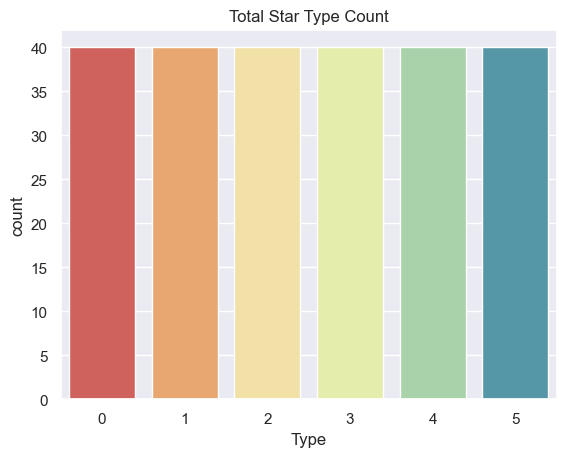

In [8]:
# show class type counts
sns.set_theme(style="darkgrid")
plot = sns.countplot(x=data_target['Type'], palette='Spectral')
plot.set(title='Total Star Type Count')
plt.show()

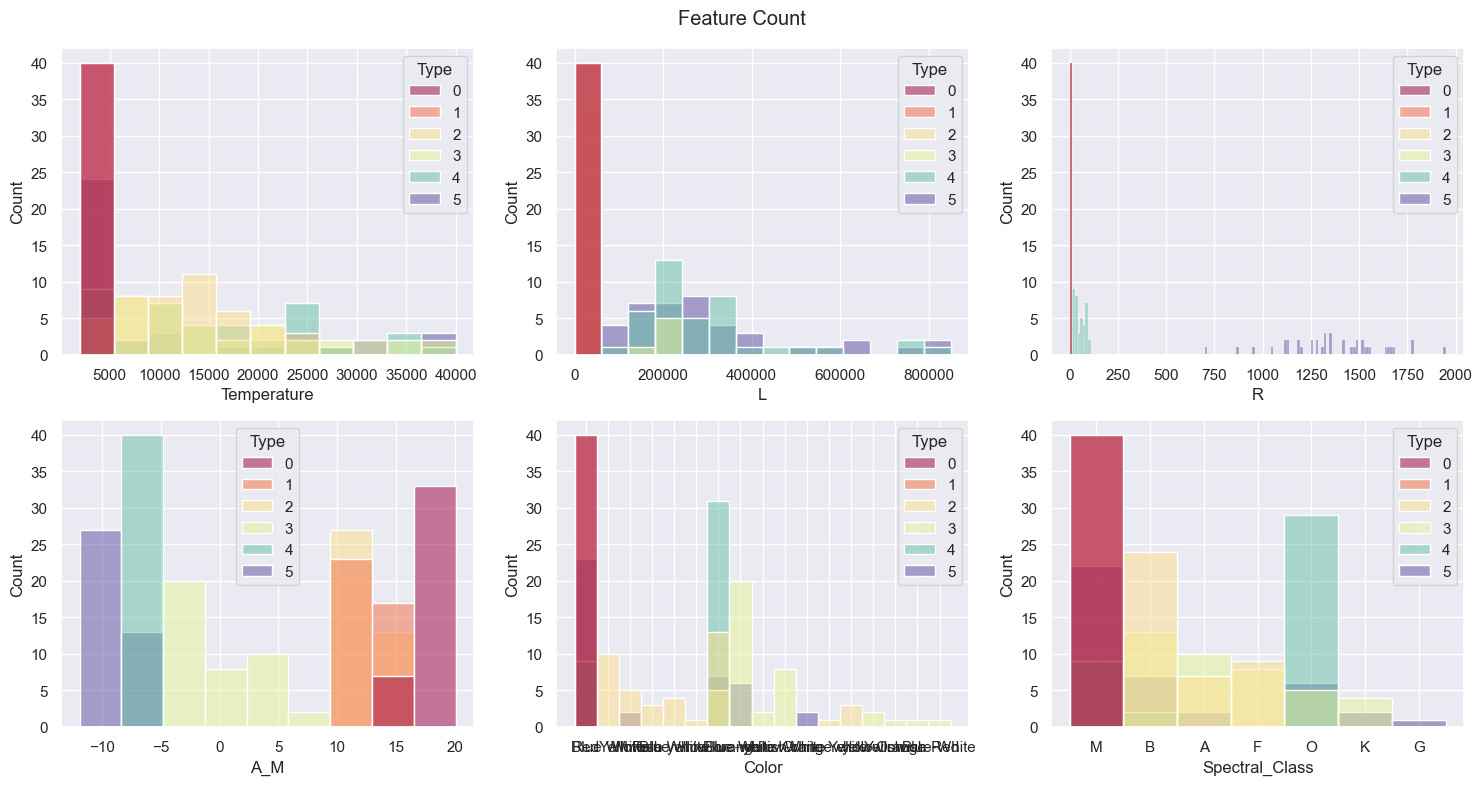

In [27]:
plot_d = data.iloc[:,0:6]
fig, plots = plt.subplots(2, 3, figsize=(15,8))
plots = plots.flatten()
for plot, col in zip(plots, plot_d.columns):
    sns.histplot(data=plot_d, 
                 x=col, 
                 ax=plot, 
                 hue=data_target['Type'], 
                 palette="Spectral")

# plots[1][1].set_aspect(2)
fig.suptitle('Feature Count')
plt.tight_layout()
plt.show()

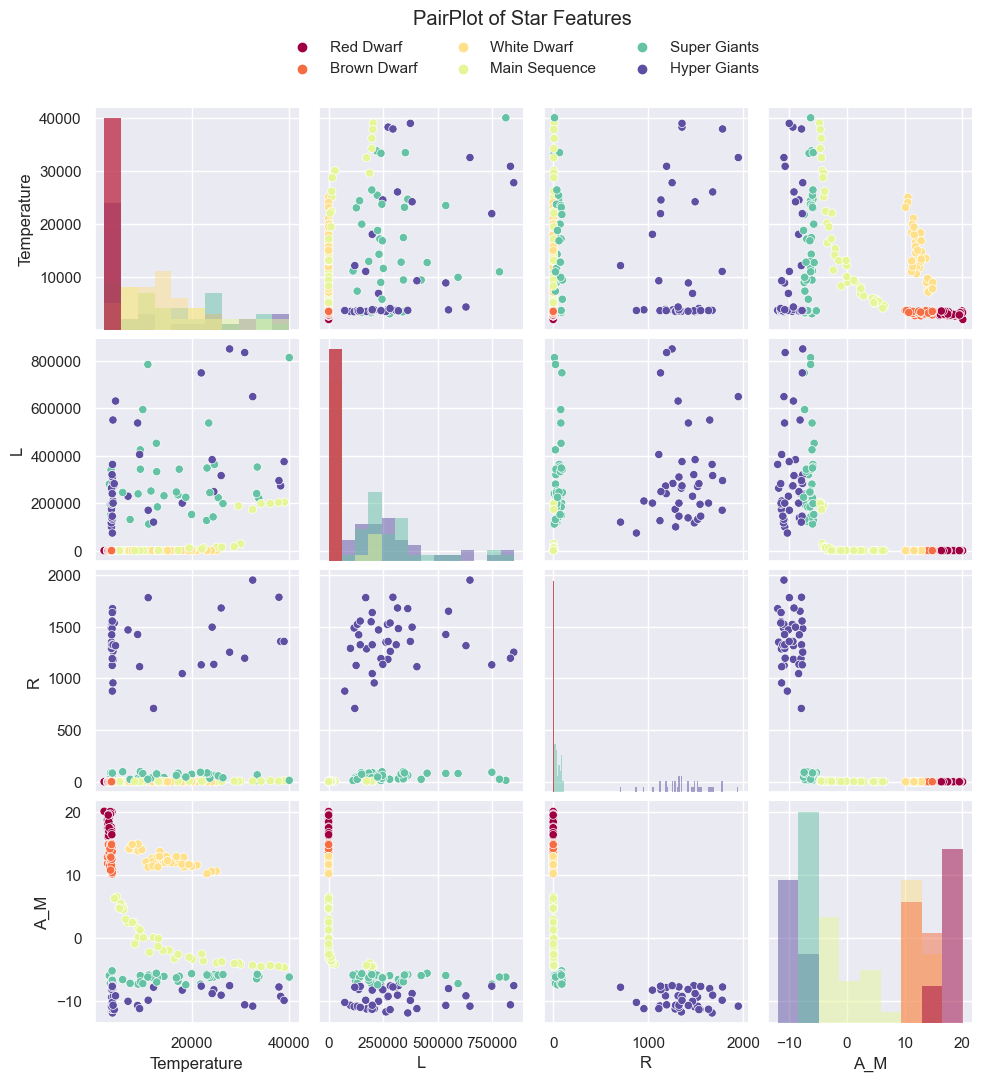

In [ ]:
plot = sns.pairplot(data, 
                    hue='Type', 
                    diag_kind="hist", 
                    diag_kws=dict(linewidth=0), 
                    palette='Spectral')

plot.fig.suptitle("PairPlot of Star Features", y=1.08)
for t, l in zip(plot._legend.texts, target_names):
    t.set_text(l)
sns.move_legend(plot, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

## Validation

## Building the Model

## Testing Other Models

In [ ]:
#Testing

# 3. Conclusion  <a name="conclusion"></a>


# References
1. https://www.kaggle.com/datasets/brsdincer/star-type-classification
2. https://en.wikipedia.org/wiki/Asteroid_spectral_types
3. https://simple.wikipedia.org/wiki/Asteroid_spectral_types#SMASS_classification
4. https://astronomy.stackexchange.com/questions/38412/determine-spectral-type-of-star-from-its-properties
5. https://iopscience.iop.org/article/10.1086/319956/fulltext/
6. https://articles.adsabs.harvard.edu//full/1973ARA%26A..11...29M/0000029.000.html